In [ ]:
%pip install pandas
%pip install numpy 
%pip install statsmodels
%pip install matplotlib
%pip install sklearn

In [79]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## Step 1: Loading all Dataframes 
* Youth Obesity 
* Adult Obesity 
* Commodities 
* Industry Trends 
* Health Insurance Trends
* Meat Production 
* SNAP Data 
* ETFs 

In [89]:
youth_obesity_df = pd.read_csv('national_obesity_data/child_obesity_data.csv')
adult_obesity_df = pd.read_csv('national_obesity_data/adult_obesity_data.csv')

commodities_df = pd.read_csv('variables_of_interest/commodities_yearly.csv')

meat_prod_df = pd.read_csv('variables_of_interest/meat_yearly.csv')

industry_df = pd.read_csv('variables_of_interest/national_industry_yearly.csv')
insurance_df = pd.read_csv('variables_of_interest/national_insurance_yearly.csv')

snap_df = pd.read_csv('SNAP_data/national_snap.csv')

non_relative_etf_df = pd.read_csv('variables_of_interest/normalized_etf_yearly.csv')
relative_etf_df = pd.read_csv('variables_of_interest/relative_etf_performance_yearly.csv')

## Merge Dataframes

In [81]:
adult_obesity_df = adult_obesity_df.drop(columns=["Unnamed: 0", "LocationDesc"])
adult_obesity_df = adult_obesity_df.rename(columns={"Weighted_Data_Value" : "Avg_Adult_Obesity_Rate"})
adult_obesity_df

,Year,Avg_Adult_Obesity_Rate
0,2011,27.403164
1,2012,27.676900
2,2013,28.253890
3,2014,28.846556
4,2015,28.789366
5,2016,29.515772
6,2017,30.048435
7,2018,30.876317
8,2019,31.302005
9,2020,31.763344


In [82]:
commodities_df = commodities_df.drop(columns=["Unnamed: 0"])
commodities_df

temp_df =  pd.merge(adult_obesity_df, commodities_df, on='Year', how='inner')
temp_df

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar
0,2011,27.403164,271.108058,291.854083,26.235584
1,2012,27.676900,186.441583,298.437549,21.374502
2,2013,28.253890,139.484337,258.979466,17.708548
3,2014,28.846556,200.355896,192.939234,17.127041
4,2015,28.789366,159.903686,169.844637,13.215141
5,2016,29.515772,163.839985,159.220972,18.143677
6,2017,30.048435,150.755953,154.595020,15.834655
7,2018,30.876317,132.714927,164.510829,12.251345
8,2019,31.302005,130.555761,170.169445,12.350470
9,2020,31.763344,150.831950,165.578388,12.884191


In [83]:
meat_prod_df = meat_prod_df.drop(columns=["Unnamed: 0"])
temp_df2 = pd.merge(temp_df, meat_prod_df, on='Year', how='inner')
temp_df2

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,Veal
0,2011,27.403164,271.108058,291.854083,26.235584,2168.733333,3100.208333,12.062500,43.458333,1889.887500,482.741667,10.654167
1,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,498.716667,9.708333
2,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,485.333333,9.179167
3,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,475.316667,7.762500
4,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,470.016667,6.816667
5,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,496.975000,6.225000
6,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,499.841667,6.116667
7,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,490.916667,6.237500
8,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,484.908333,6.137500
9,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,476.625000,5.279167


In [84]:
industry_df = industry_df.drop(columns=["Unnamed: 0"])
industry_df

,Year,Label (Grouping),Estimate
0,2010,"Agriculture, forestry, fishing and hunting, an...",50952.557692
1,2010,"Arts, entertainment, and recreation, and accom...",243475.615385
2,2010,Construction,196185.288462
3,2010,"Educational services, and health care and soci...",606453.115385
4,2010,"Finance and insurance, and real estate and ren...",192198.307692
...,...,...,...
164,2022,"Professional, scientific, and management, and ...",373097.365385
165,2022,Public administration,144944.038462
166,2022,Retail trade,338628.923077
167,2022,"Transportation and warehousing, and utilities",177531.788462


In [85]:
def merge_dataset(aligned_df, rotated_df):
    rotated_df_pivot = rotated_df.pivot(index='Year', columns='Label (Grouping)', values='Estimate').reset_index()
    merged_data = pd.merge(aligned_df, rotated_df_pivot, on='Year', how='inner')
    return merged_data

temp_merged = merge_dataset(temp_df2, industry_df)

In [86]:
temp_merged

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,...,"Educational services, and health care and social assistance","Finance and insurance, and real estate and rental and leasing",Information,Manufacturing,"Other services, except public administration","Professional, scientific, and management, and administrative and waste management services",Public administration,Retail trade,"Transportation and warehousing, and utilities",Wholesale trade
0,2011,27.403164,271.108058,291.854083,26.235584,2168.733333,3100.208333,12.062500,43.458333,1889.887500,...,618981.923077,188452.769231,62998.192308,296034.173077,135042.884615,289239.365385,136088.057692,316990.250000,138740.692308,80639.750000
1,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,...,630229.596154,185309.519231,60744.807692,292063.865385,136318.423077,293101.826923,137117.730769,318648.615385,137272.557692,77927.538462
2,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,...,637067.057692,183242.115385,59145.000000,287881.596154,136604.307692,296207.730769,137303.557692,318487.769231,135604.980769,76346.576923
3,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,...,645186.269231,183189.634615,59311.057692,289496.384615,137936.903846,302343.730769,137625.923077,322015.288462,136677.134615,76319.173077
4,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,...,653658.942308,185314.019231,59911.423077,293606.980769,139553.461538,311098.692308,136391.230769,326531.076923,139718.769231,76888.250000
5,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,...,662538.019231,188239.076923,60629.615385,296392.038462,141020.750000,319606.211538,135948.346154,330190.634615,143277.807692,77363.134615
6,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,...,673656.326923,191616.346154,61410.980769,299423.519231,142855.788462,328913.634615,136847.826923,332808.826923,148473.634615,78297.384615
7,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,...,683377.711538,193680.269231,61205.846154,300820.192308,144567.942308,337637.134615,137889.019231,334182.076923,154277.230769,77963.500000
8,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,...,693853.846154,196286.076923,60219.634615,302752.365385,145727.615385,346692.134615,138904.442308,334720.961538,160465.480769,77783.153846
9,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,...,702922.384615,199500.788462,59300.269231,302102.153846,145620.846154,354169.615385,141545.192308,333297.307692,165697.846154,76936.173077


In [90]:
insurance_df = insurance_df.drop(columns=["Unnamed: 0"])
#insurance_df 

In [91]:
temp_merged = merge_dataset(temp_merged, insurance_df)

In [92]:
temp_merged

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,...,"Other services, except public administration","Professional, scientific, and management, and administrative and waste management services",Public administration,Retail trade,"Transportation and warehousing, and utilities",Wholesale trade,No health insurance coverage,With health insurance coverage,With private health insurance,With public coverage
0,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,...,136318.423077,293101.826923,137117.730769,318648.615385,137272.557692,77927.538462,348531.292308,2.000435e+06,1.627008e+06,566770.456731
1,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,...,136604.307692,296207.730769,137303.557692,318487.769231,135604.980769,76346.576923,351137.142308,2.013742e+06,1.619283e+06,587391.677885
2,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,...,137936.903846,302343.730769,137625.923077,322015.288462,136677.134615,76319.173077,337916.492308,2.047411e+06,1.629863e+06,612197.956731
3,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,...,139553.461538,311098.692308,136391.230769,326531.076923,139718.769231,76888.250000,311335.965385,2.094857e+06,1.653573e+06,639900.870192
4,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,...,141020.750000,319606.211538,135948.346154,330190.634615,143277.807692,77363.134615,282434.142308,2.141150e+06,1.678940e+06,666447.187500
5,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,...,142855.788462,328913.634615,136847.826923,332808.826923,148473.634615,78297.384615,255293.711538,2.169764e+06,1.693315e+06,684777.038462
6,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,...,144567.942308,337637.134615,137889.019231,334182.076923,154277.230769,77963.500000,228951.703846,2.211654e+06,1.716852e+06,707995.533654
7,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,...,145727.615385,346692.134615,138904.442308,334720.961538,160465.480769,77783.153846,217428.911538,2.235065e+06,1.731062e+06,720697.764423
8,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,...,145620.846154,354169.615385,141545.192308,333297.307692,165697.846154,76936.173077,215964.023077,2.247256e+06,1.742315e+06,726185.471154
9,2021,32.853809,204.694029,259.394838,17.856061,2309.700000,3741.608333,10.845833,44.775000,2300.629167,...,145102.250000,364012.692308,144048.384615,334520.346154,172036.788462,75905.980769,219253.253846,2.267963e+06,1.753236e+06,737646.548077


## Process SNAP DF

In [93]:
snap_df

,Date,Households,Persons,Benefit / Households,Benefit / Persons,Cost,State
0,1988-10-01,7.047600e+06,1.844674e+07,136.3995,52.1116,9.612890e+08,US Summary
1,1988-11-01,7.067674e+06,1.843460e+07,135.4848,51.9437,9.575621e+08,US Summary
2,1988-12-01,7.159716e+06,1.870979e+07,136.5145,52.2403,9.774048e+08,US Summary
3,1989-01-01,7.215717e+06,1.881459e+07,134.6671,51.6471,9.717196e+08,US Summary
4,1989-02-01,7.215334e+06,1.880535e+07,135.2913,51.9093,9.761719e+08,US Summary
...,...,...,...,...,...,...,...
422,2023-12-01,2.197695e+07,4.139976e+07,357.3542,189.7005,7.853555e+09,US Summary
423,2024-01-01,2.195544e+07,4.128024e+07,352.7219,187.5997,7.744163e+09,US Summary
424,2024-02-01,2.194161e+07,4.123408e+07,344.1920,183.1526,7.552128e+09,US Summary
425,2024-03-01,2.213952e+07,4.154683e+07,348.2064,185.5526,7.709121e+09,US Summary


In [94]:
snap_df['Date'] = pd.to_datetime(snap_df['Date'])

numeric_cols = snap_df.select_dtypes(include='number').columns
snap_df_numeric = snap_df[numeric_cols]

yearly_avg_df = snap_df_numeric.groupby(snap_df['Date'].dt.year).mean().reset_index()


yearly_avg_df


,Date,Households,Persons,Benefit / Households,Benefit / Persons,Cost
0,1988,7.091663e+06,1.853037e+07,136.132933,52.098533,9.654186e+08
1,1989,7.337547e+06,1.902732e+07,139.178583,53.677525,1.022183e+09
2,1990,7.999990e+06,2.052135e+07,153.388858,59.797842,1.228201e+09
3,1991,9.208275e+06,2.341113e+07,165.575367,65.125217,1.526149e+09
4,1992,1.028236e+07,2.589835e+07,172.373383,68.433883,1.772469e+09
5,1993,1.090229e+07,2.721618e+07,170.042267,68.116092,1.853907e+09
6,1994,1.109357e+07,2.739634e+07,171.985900,69.647833,1.907836e+09
7,1995,1.079165e+07,2.634259e+07,174.524483,71.500625,1.883348e+09
8,1996,1.039515e+07,2.510139e+07,176.566933,73.124008,1.835759e+09
9,1997,9.087686e+06,2.198004e+07,171.570333,70.940167,1.559403e+09


In [95]:
yearly_avg_df = yearly_avg_df.rename(columns={"Date" : "Year"})
temp_merged_pre_ETF = pd.merge(temp_merged, yearly_avg_df, on='Year', how='inner')
temp_merged_pre_ETF

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,...,Wholesale trade,No health insurance coverage,With health insurance coverage,With private health insurance,With public coverage,Households,Persons,Benefit / Households,Benefit / Persons,Cost
0,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,...,77927.538462,348531.292308,2.000435e+06,1.627008e+06,566770.456731,2.256805e+07,4.694152e+07,277.526517,133.422325,6.263415e+09
1,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,...,76346.576923,351137.142308,2.013742e+06,1.619283e+06,587391.677885,2.304451e+07,4.753872e+07,271.065208,131.397608,6.246910e+09
2,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,...,76319.173077,337916.492308,2.047411e+06,1.629863e+06,612197.956731,2.268336e+07,4.642680e+07,255.962483,125.062058,5.806137e+09
3,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,...,76888.250000,311335.965385,2.094857e+06,1.653573e+06,639900.870192,2.243287e+07,4.551626e+07,256.340992,126.338875,5.750514e+09
4,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,...,77363.134615,282434.142308,2.141150e+06,1.678940e+06,666447.187500,2.152162e+07,4.370454e+07,254.447550,125.296117,5.476157e+09
5,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,...,78297.384615,255293.711538,2.169764e+06,1.693315e+06,684777.038462,2.084585e+07,4.230542e+07,257.250842,126.729158,5.368190e+09
6,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,...,77963.500000,228951.703846,2.211654e+06,1.716852e+06,707995.533654,1.980753e+07,3.974750e+07,245.435758,122.312683,4.861426e+09
7,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,...,77783.153846,217428.911538,2.235065e+06,1.731062e+06,720697.764423,1.784165e+07,3.528586e+07,249.138958,125.859058,4.570877e+09
8,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,...,76936.173077,215964.023077,2.247256e+06,1.742315e+06,726185.471154,2.112052e+07,4.089873e+07,328.516492,169.720617,6.993836e+09
9,2021,32.853809,204.694029,259.394838,17.856061,2309.700000,3741.608333,10.845833,44.775000,2300.629167,...,75905.980769,219253.253846,2.267963e+06,1.753236e+06,737646.548077,2.171736e+07,4.150400e+07,438.048292,229.225333,9.511052e+09


In [96]:
temp_merged_pre_ETF = temp_merged_pre_ETF.rename(columns={"Cost" : "SNAP Cost", "Person" : "SNAP Person Count"})

In [97]:
temp_merged_pre_ETF

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,...,Wholesale trade,No health insurance coverage,With health insurance coverage,With private health insurance,With public coverage,Households,Persons,Benefit / Households,Benefit / Persons,SNAP Cost
0,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,...,77927.538462,348531.292308,2.000435e+06,1.627008e+06,566770.456731,2.256805e+07,4.694152e+07,277.526517,133.422325,6.263415e+09
1,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,...,76346.576923,351137.142308,2.013742e+06,1.619283e+06,587391.677885,2.304451e+07,4.753872e+07,271.065208,131.397608,6.246910e+09
2,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,...,76319.173077,337916.492308,2.047411e+06,1.629863e+06,612197.956731,2.268336e+07,4.642680e+07,255.962483,125.062058,5.806137e+09
3,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,...,76888.250000,311335.965385,2.094857e+06,1.653573e+06,639900.870192,2.243287e+07,4.551626e+07,256.340992,126.338875,5.750514e+09
4,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,...,77363.134615,282434.142308,2.141150e+06,1.678940e+06,666447.187500,2.152162e+07,4.370454e+07,254.447550,125.296117,5.476157e+09
5,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,...,78297.384615,255293.711538,2.169764e+06,1.693315e+06,684777.038462,2.084585e+07,4.230542e+07,257.250842,126.729158,5.368190e+09
6,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,...,77963.500000,228951.703846,2.211654e+06,1.716852e+06,707995.533654,1.980753e+07,3.974750e+07,245.435758,122.312683,4.861426e+09
7,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,...,77783.153846,217428.911538,2.235065e+06,1.731062e+06,720697.764423,1.784165e+07,3.528586e+07,249.138958,125.859058,4.570877e+09
8,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,...,76936.173077,215964.023077,2.247256e+06,1.742315e+06,726185.471154,2.112052e+07,4.089873e+07,328.516492,169.720617,6.993836e+09
9,2021,32.853809,204.694029,259.394838,17.856061,2309.700000,3741.608333,10.845833,44.775000,2300.629167,...,75905.980769,219253.253846,2.267963e+06,1.753236e+06,737646.548077,2.171736e+07,4.150400e+07,438.048292,229.225333,9.511052e+09


## Merge ETFs 

In [98]:
non_relative_etf_df
non_relative_etf_df = non_relative_etf_df.drop(columns=['Volatility'])

In [99]:
non_relative_etf_df

,Unnamed: 0,Year,ETF,Price
0,0,1999,Agri_Machinery_ETF,35.896562
1,1,1999,Food_Beverage_ETF,38.574624
2,2,1999,Investment_Funds_ETF,127.576142
3,3,1999,Restaurant_FastFood_ETF,33.656642
4,4,1999,Retail_ETF,16.157612
...,...,...,...,...
125,125,2024,Agri_Machinery_ETF,275.591445
126,126,2024,Food_Beverage_ETF,423.274203
127,127,2024,Investment_Funds_ETF,383.809935
128,128,2024,Restaurant_FastFood_ETF,1523.165088


In [100]:
def merge_datasets_2(health_df, stock_df):
    stock_df_pivot = stock_df.pivot(index='Year', columns='ETF', values='Price').reset_index()
    merged_data = pd.merge(health_df, stock_df_pivot, on='Year', how='inner')
    return merged_data

non_relative_merge = merge_datasets_2(temp_merged_pre_ETF, non_relative_etf_df)

In [101]:

non_relative_merge.drop(columns=['Investment_Funds_ETF'])
non_relative_merge

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,...,Households,Persons,Benefit / Households,Benefit / Persons,SNAP Cost,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,...,2.256805e+07,4.694152e+07,277.526517,133.422325,6.263415e+09,87.597329,48.148766,118.940536,193.059748,89.656692
1,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,...,2.304451e+07,4.753872e+07,271.065208,131.397608,6.246910e+09,96.385283,58.923661,142.139976,230.633694,100.834668
2,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,...,2.268336e+07,4.642680e+07,255.962483,125.062058,5.806137e+09,97.784619,67.665027,177.515955,350.553272,67.455829
3,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,...,2.243287e+07,4.551626e+07,256.340992,126.338875,5.750514e+09,83.722175,82.714692,191.236654,387.937927,87.330357
4,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,...,2.152162e+07,4.370454e+07,254.447550,125.296117,5.476157e+09,88.686024,87.831202,194.304409,272.213151,82.903563
5,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,...,2.084585e+07,4.230542e+07,257.250842,126.729158,5.368190e+09,117.115491,103.134290,233.581421,249.613016,63.331386
6,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,...,1.980753e+07,3.974750e+07,245.435758,122.312683,4.861426e+09,125.432730,95.022750,266.890332,273.965688,78.154474
7,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,...,1.784165e+07,3.528586e+07,249.138958,125.859058,4.570877e+09,125.592757,138.079579,284.004801,419.124110,98.058593
8,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,...,2.112052e+07,4.089873e+07,328.516492,169.720617,6.993836e+09,133.206021,136.249434,321.997471,582.325831,120.790171
9,2021,32.853809,204.694029,259.394838,17.856061,2309.700000,3741.608333,10.845833,44.775000,2300.629167,...,2.171736e+07,4.150400e+07,438.048292,229.225333,9.511052e+09,231.153496,191.658392,331.483617,901.627783,188.548964


## Process Relative ETF DFs

In [102]:

relative_etf_df['Year'] = pd.to_datetime(relative_etf_df['Date']).dt.year
relative_etf_df.drop(columns=['Date'], inplace=True)
relative_etf_df

,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF,Year
0,51.465515,38.353662,36.978234,50.261539,2000
1,0.362877,-0.255913,0.663971,-1.651667,2001
2,-0.164652,-0.463279,0.542666,-7.624738,2002
3,-0.661211,-0.543770,1.043152,-5.558940,2003
4,-2.598824,-0.907903,0.519014,-6.287787,2004
5,-3.065596,-1.033735,-0.405637,-10.637452,2005
6,-6.306599,-1.731016,-1.901232,-20.536441,2006
7,103.718535,20.761331,43.685086,161.197073,2007
8,-5.256171,-0.729167,-2.305108,-8.673413,2008
9,-0.652560,-0.105763,-1.033707,-5.022206,2009


In [103]:
relative_merge = pd.merge(temp_merged_pre_ETF, relative_etf_df)

In [104]:
relative_merge

,Year,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,...,With public coverage,Households,Persons,Benefit / Households,Benefit / Persons,SNAP Cost,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF
0,2012,27.676900,186.441583,298.437549,21.374502,2145.216667,3086.616667,12.666667,43.041667,1930.937500,...,566770.456731,2.256805e+07,4.694152e+07,277.526517,133.422325,6.263415e+09,-21.277508,-3.666695,-69.968512,-67.201870
1,2013,28.253890,139.484337,258.979466,17.708548,2129.362500,3152.508333,12.562500,43.608333,1926.125000,...,587391.677885,2.304451e+07,4.753872e+07,271.065208,131.397608,6.246910e+09,14.760984,4.621000,51.267083,45.907360
2,2014,28.846556,200.355896,192.939234,17.127041,2007.600000,3213.775000,12.541667,43.433333,1898.037500,...,612197.956731,2.268336e+07,4.642680e+07,255.962483,125.062058,5.806137e+09,4.404296,1.926507,24.053007,8.110500
3,2015,28.789366,159.903686,169.844637,13.215141,1962.195833,3337.358333,12.058333,43.550000,2035.691667,...,639900.870192,2.243287e+07,4.551626e+07,256.340992,126.338875,5.750514e+09,2.669974,2.293140,21.094866,8.827462
4,2016,29.515772,163.839985,159.220972,18.143677,2088.704167,3391.366667,12.008333,45.700000,2072.083333,...,666447.187500,2.152162e+07,4.370454e+07,254.447550,125.296117,5.476157e+09,2.811603,2.441306,13.551273,7.897822
5,2017,30.048435,150.755953,154.595020,15.834655,2168.454167,3471.858333,11.566667,44.625000,2125.850000,...,684777.038462,2.084585e+07,4.230542e+07,257.250842,126.729158,5.368190e+09,2.722992,2.014195,7.722132,3.513706
6,2018,30.876317,132.714927,164.510829,12.251345,2225.345833,3550.050000,12.204167,44.958333,2187.150000,...,707995.533654,1.980753e+07,3.974750e+07,245.435758,122.312683,4.861426e+09,2.284124,1.340053,6.538430,3.513716
7,2019,31.302005,130.555761,170.169445,12.350470,2249.000000,3658.750000,11.766667,44.041667,2297.675000,...,720697.764423,1.784165e+07,3.528586e+07,249.138958,125.859058,4.570877e+09,2.037860,2.103760,9.340499,4.133948
8,2020,31.763344,150.831950,165.578388,12.884191,2246.333333,3715.283333,10.895833,45.783333,2352.375000,...,726185.471154,2.112052e+07,4.089873e+07,328.516492,169.720617,6.993836e+09,1.778803,1.661523,10.697083,4.249279
9,2021,32.853809,204.694029,259.394838,17.856061,2309.700000,3741.608333,10.845833,44.775000,2300.629167,...,737646.548077,2.171736e+07,4.150400e+07,438.048292,229.225333,9.511052e+09,3.403219,2.482926,16.135069,6.675359


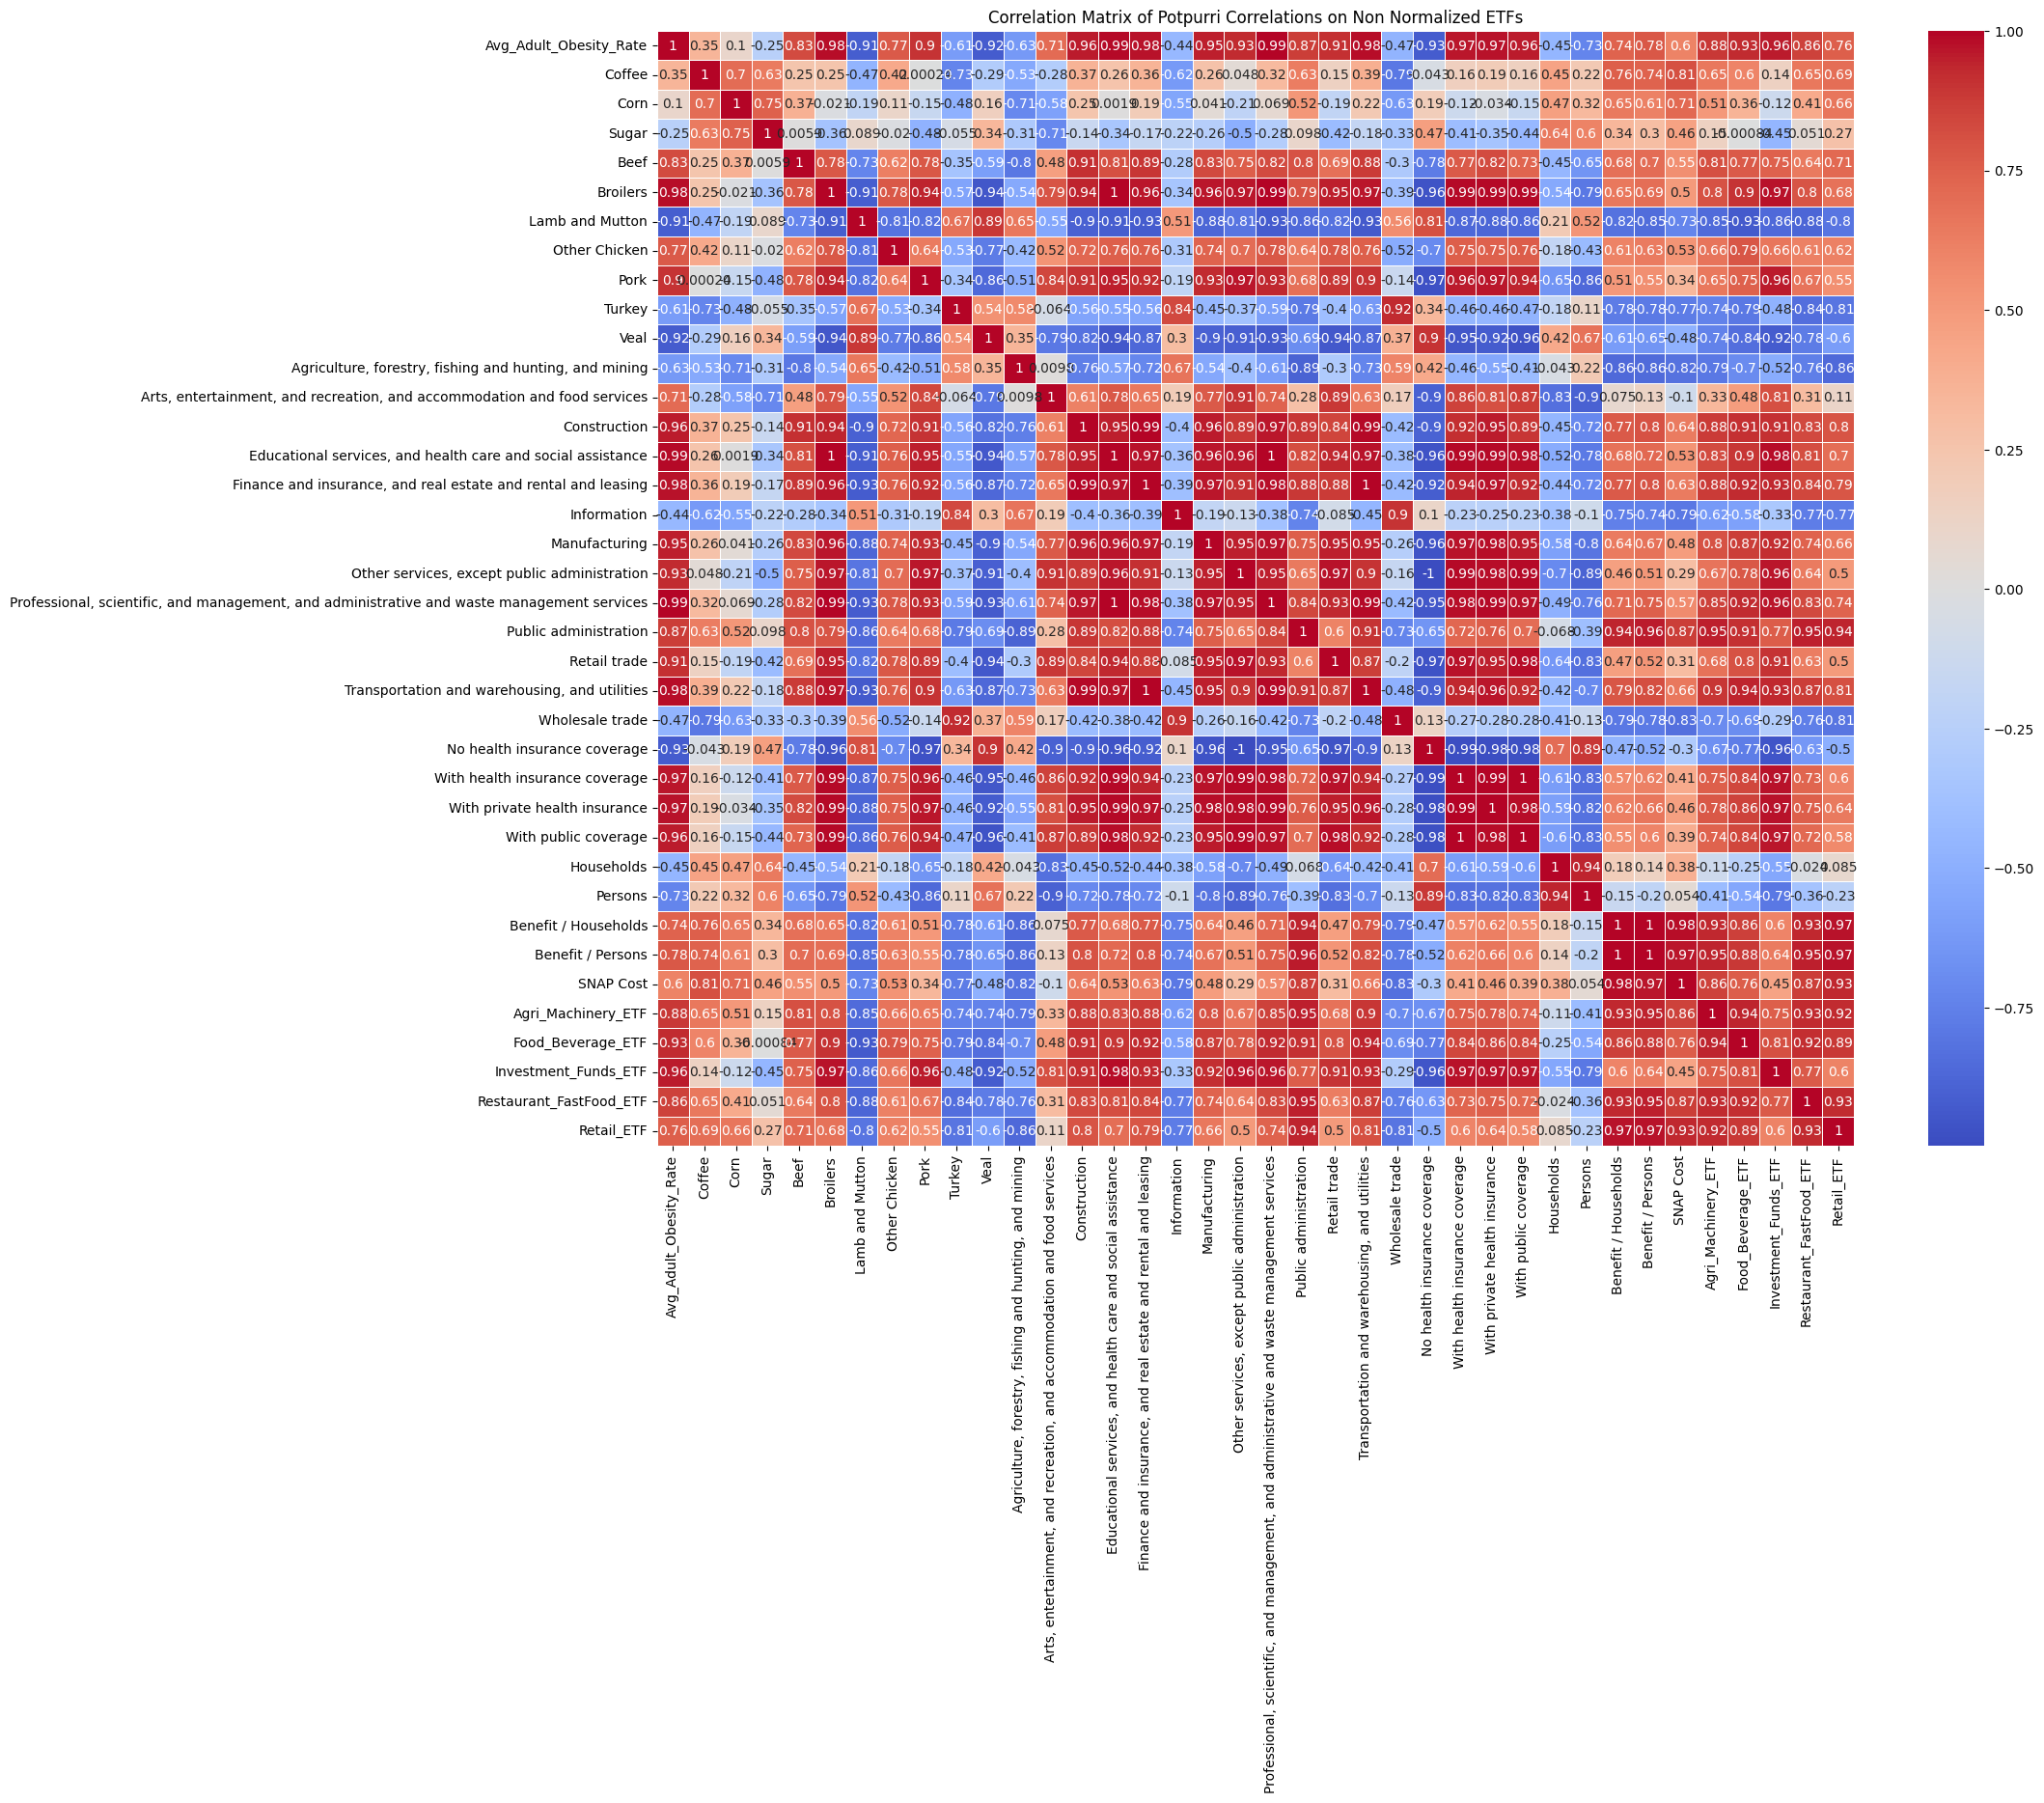

,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,...,Households,Persons,Benefit / Households,Benefit / Persons,SNAP Cost,Agri_Machinery_ETF,Food_Beverage_ETF,Investment_Funds_ETF,Restaurant_FastFood_ETF,Retail_ETF
Avg_Adult_Obesity_Rate,1.000000,0.350884,0.102548,-0.247096,0.828079,0.981708,-0.912710,0.767399,0.902997,-0.613155,...,-0.453910,-0.729192,0.741909,0.777593,0.603534,0.884924,0.928505,0.960383,0.856748,0.757695
Coffee,0.350884,1.000000,0.700192,0.633322,0.246629,0.248223,-0.474405,0.418012,0.000240,-0.727133,...,0.451925,0.217060,0.758062,0.739784,0.807654,0.650188,0.596049,0.143666,0.654490,0.688222
Corn,0.102548,0.700192,1.000000,0.747903,0.373953,-0.020846,-0.187393,0.110423,-0.148844,-0.484574,...,0.467840,0.324734,0.648630,0.612275,0.713823,0.506707,0.360032,-0.121106,0.407714,0.659325
Sugar,-0.247096,0.633322,0.747903,1.000000,0.005856,-0.364834,0.088848,-0.019934,-0.479274,-0.055132,...,0.642053,0.603212,0.343184,0.295112,0.457489,0.147203,-0.000845,-0.454522,0.050871,0.270080
Beef,0.828079,0.246629,0.373953,0.005856,1.000000,0.780446,-0.725687,0.623031,0.776168,-0.351843,...,-0.449613,-0.649275,0.684042,0.702545,0.552974,0.807009,0.771731,0.748254,0.642776,0.712520
Broilers,0.981708,0.248223,-0.020846,-0.364834,0.780446,1.000000,-0.914191,0.778839,0.944748,-0.566793,...,-0.536761,-0.790847,0.649831,0.691078,0.499642,0.802052,0.899685,0.969109,0.796176,0.679655
Lamb and Mutton,-0.912710,-0.474405,-0.187393,0.088848,-0.725687,-0.914191,1.000000,-0.810996,-0.820766,0.674067,...,0.209957,0.517676,-0.820405,-0.845917,-0.727308,-0.853426,-0.934117,-0.857321,-0.879806,-0.802628
Other Chicken,0.767399,0.418012,0.110423,-0.019934,0.623031,0.778839,-0.810996,1.000000,0.636836,-0.533256,...,-0.183779,-0.425061,0.609157,0.633862,0.531382,0.664915,0.785594,0.660261,0.612584,0.615612
Pork,0.902997,0.000240,-0.148844,-0.479274,0.776168,0.944748,-0.820766,0.636836,1.000000,-0.342349,...,-0.653700,-0.858266,0.507625,0.551289,0.341852,0.649835,0.747073,0.957631,0.665916,0.546889
Turkey,-0.613155,-0.727133,-0.484574,-0.055132,-0.351843,-0.566793,0.674067,-0.533256,-0.342349,1.000000,...,-0.181856,0.108632,-0.775859,-0.784290,-0.771309,-0.744930,-0.787593,-0.479658,-0.839327,-0.809168


In [105]:
def plt_corr_matrix(df, question):
    numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'])    
    corr_matrix = numeric_df.corr()
    
    plt.figure(figsize=(20, 15))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Correlation Matrix of {question}')
    plt.show()
    
    return corr_matrix

plt_corr_matrix(non_relative_merge, "Potpurri Correlations on Non Relative ETFs")

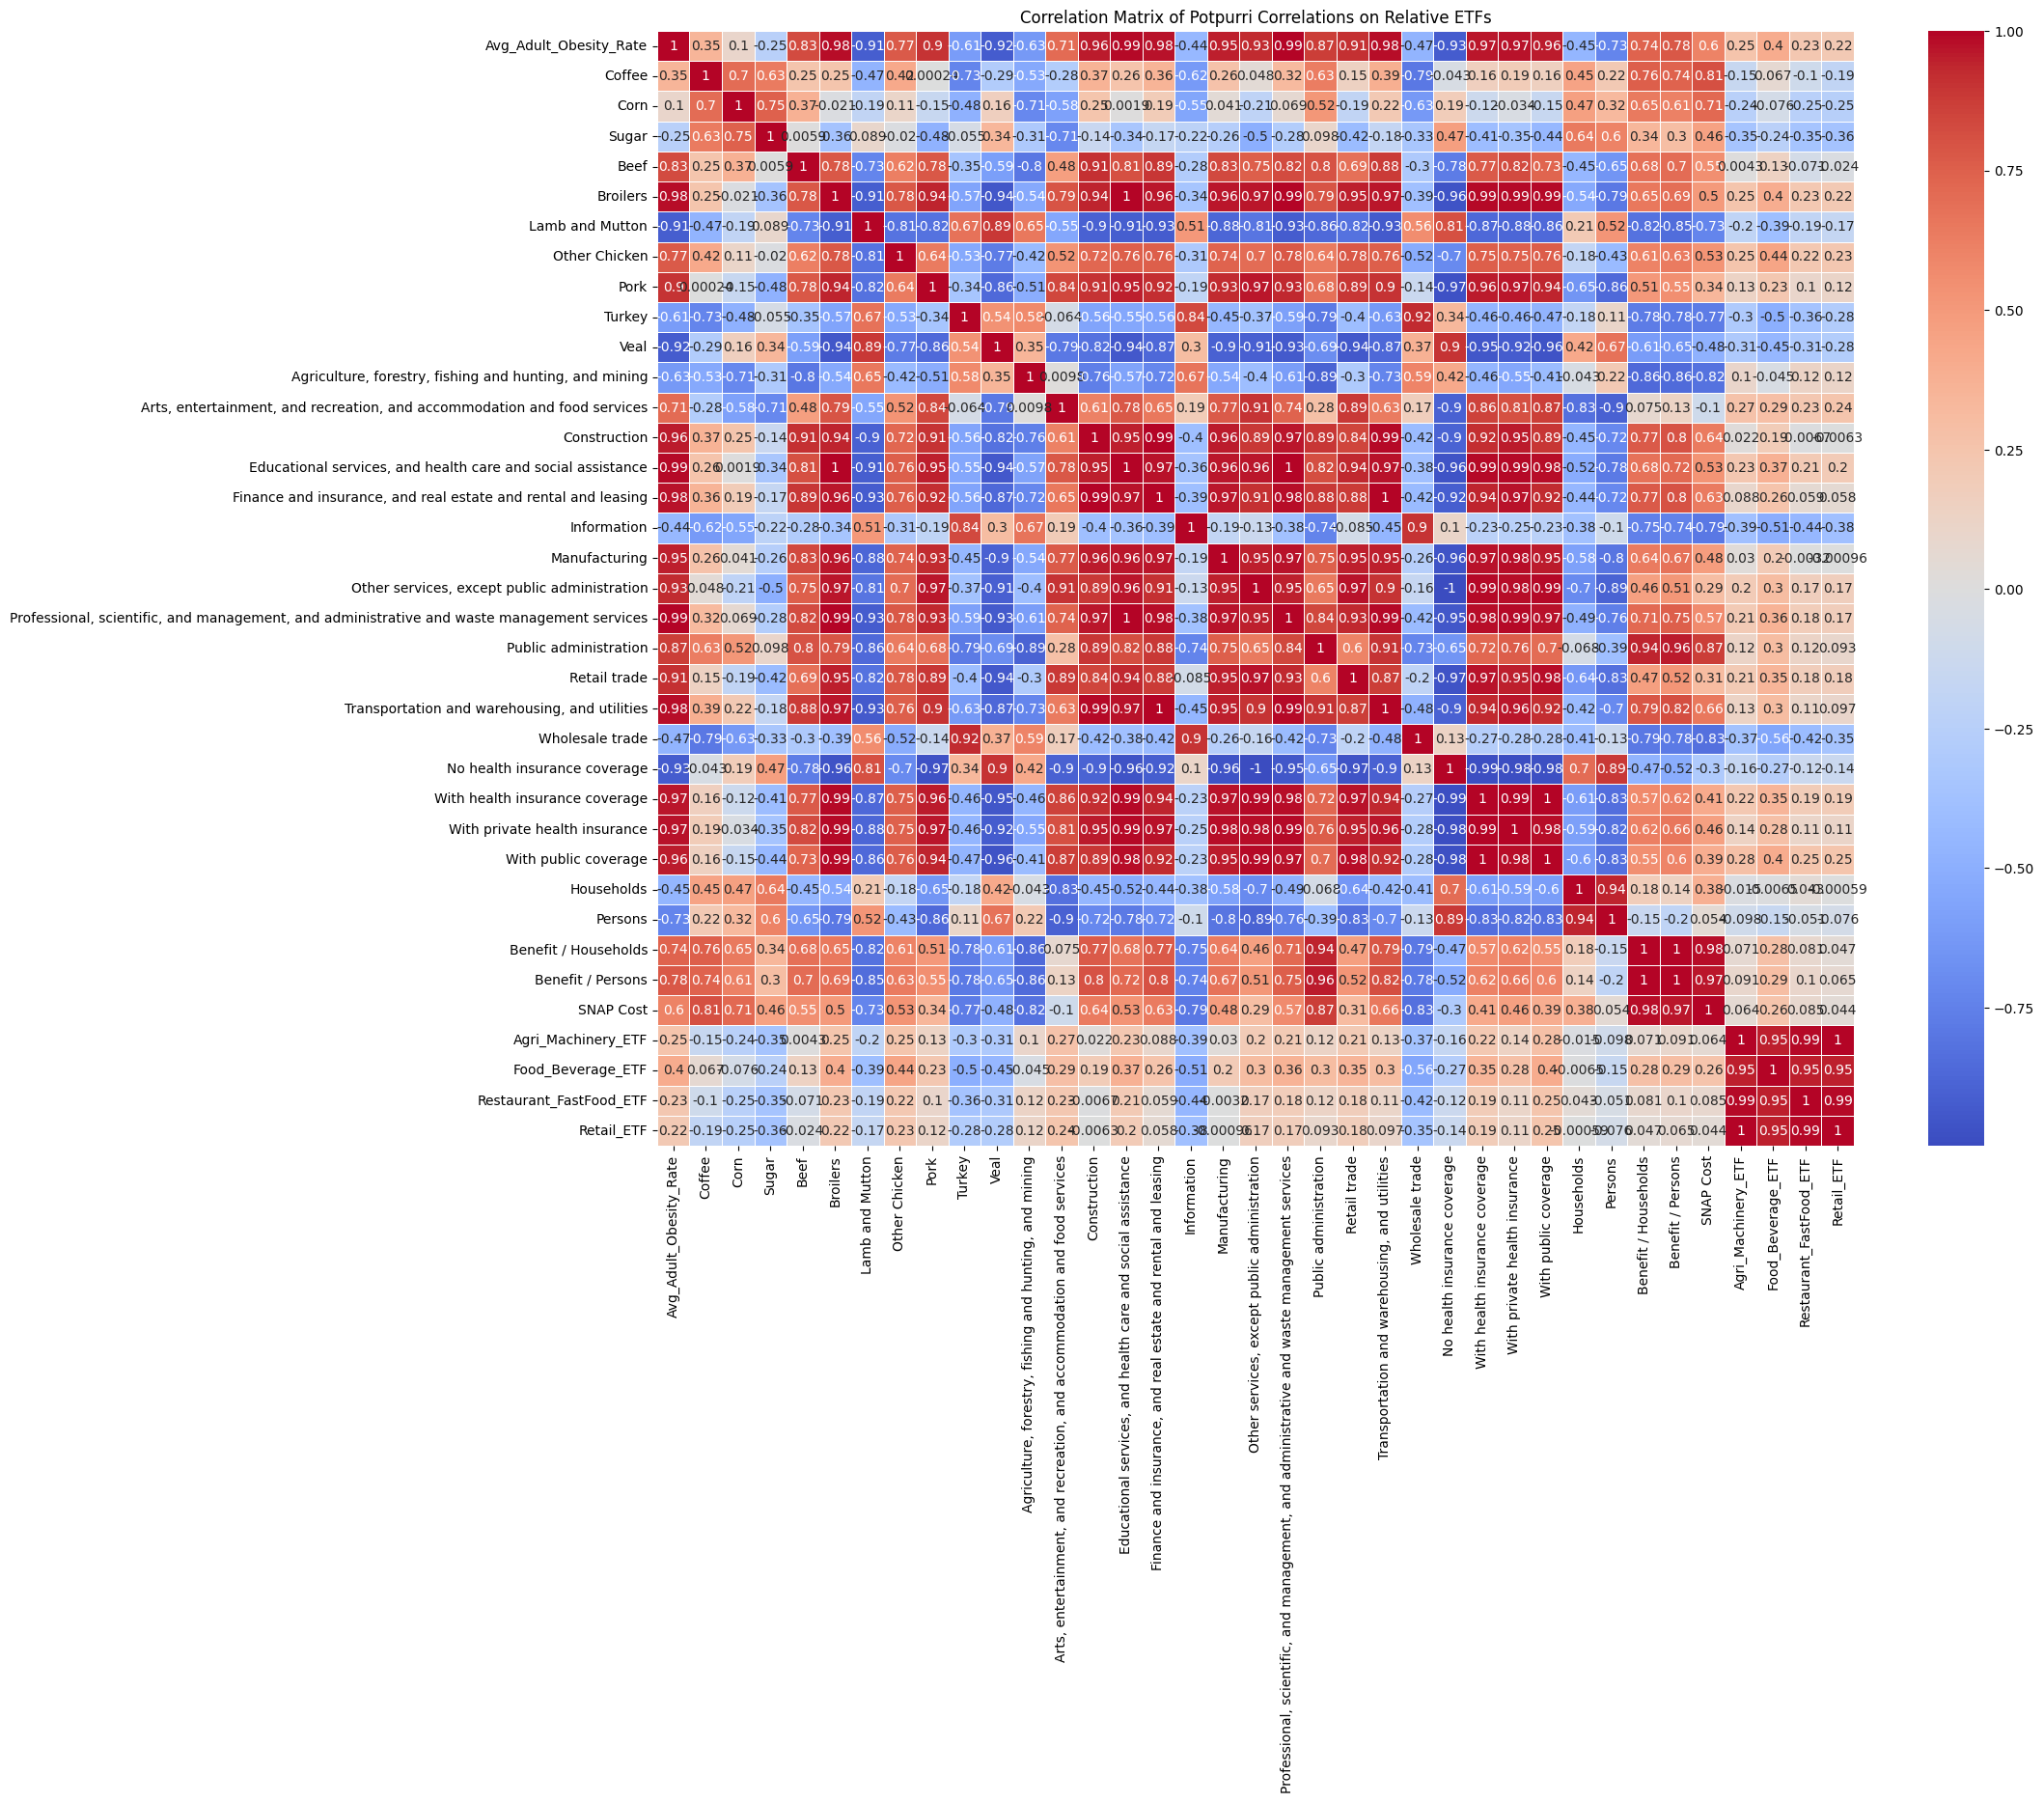

,Avg_Adult_Obesity_Rate,Coffee,Corn,Sugar,Beef,Broilers,Lamb and Mutton,Other Chicken,Pork,Turkey,...,With public coverage,Households,Persons,Benefit / Households,Benefit / Persons,SNAP Cost,Agri_Machinery_ETF,Food_Beverage_ETF,Restaurant_FastFood_ETF,Retail_ETF
Avg_Adult_Obesity_Rate,1.000000,0.350884,0.102548,-0.247096,0.828079,0.981708,-0.912710,0.767399,0.902997,-0.613155,...,0.959281,-0.453910,-0.729192,0.741909,0.777593,0.603534,0.251604,0.399630,0.229488,0.215961
Coffee,0.350884,1.000000,0.700192,0.633322,0.246629,0.248223,-0.474405,0.418012,0.000240,-0.727133,...,0.155698,0.451925,0.217060,0.758062,0.739784,0.807654,-0.151489,0.066865,-0.103380,-0.187945
Corn,0.102548,0.700192,1.000000,0.747903,0.373953,-0.020846,-0.187393,0.110423,-0.148844,-0.484574,...,-0.152734,0.467840,0.324734,0.648630,0.612275,0.713823,-0.244477,-0.076160,-0.245614,-0.249918
Sugar,-0.247096,0.633322,0.747903,1.000000,0.005856,-0.364834,0.088848,-0.019934,-0.479274,-0.055132,...,-0.436212,0.642053,0.603212,0.343184,0.295112,0.457489,-0.354415,-0.238316,-0.354321,-0.361933
Beef,0.828079,0.246629,0.373953,0.005856,1.000000,0.780446,-0.725687,0.623031,0.776168,-0.351843,...,0.732478,-0.449613,-0.649275,0.684042,0.702545,0.552974,0.004348,0.134647,-0.070528,-0.023917
Broilers,0.981708,0.248223,-0.020846,-0.364834,0.780446,1.000000,-0.914191,0.778839,0.944748,-0.566793,...,0.986460,-0.536761,-0.790847,0.649831,0.691078,0.499642,0.245002,0.395315,0.225165,0.216203
Lamb and Mutton,-0.912710,-0.474405,-0.187393,0.088848,-0.725687,-0.914191,1.000000,-0.810996,-0.820766,0.674067,...,-0.861597,0.209957,0.517676,-0.820405,-0.845917,-0.727308,-0.195434,-0.394454,-0.191760,-0.169763
Other Chicken,0.767399,0.418012,0.110423,-0.019934,0.623031,0.778839,-0.810996,1.000000,0.636836,-0.533256,...,0.760148,-0.183779,-0.425061,0.609157,0.633862,0.531382,0.249757,0.442863,0.222471,0.227909
Pork,0.902997,0.000240,-0.148844,-0.479274,0.776168,0.944748,-0.820766,0.636836,1.000000,-0.342349,...,0.941250,-0.653700,-0.858266,0.507625,0.551289,0.341852,0.130861,0.228671,0.101344,0.115707
Turkey,-0.613155,-0.727133,-0.484574,-0.055132,-0.351843,-0.566793,0.674067,-0.533256,-0.342349,1.000000,...,-0.467643,-0.181856,0.108632,-0.775859,-0.784290,-0.771309,-0.300485,-0.500694,-0.358024,-0.281309


In [107]:
plt_corr_matrix(relative_merge, "Potpurri Correlations on Relative ETFs")

## Train a LASSO Regression Model for both relative and non-relative

In [108]:
etf_categories = ['Agri_Machinery_ETF', 'Food_Beverage_ETF', 'Restaurant_FastFood_ETF', 'Retail_ETF']

def lasso_regression(df):
    X = df.drop(columns=etf_categories + ['Year'])

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    feature_importance_dict = {}
    metrics_dict = {}

    for etf in etf_categories:
        y = df[etf]
        
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
        
        lasso = Lasso(alpha=0.1)
        lasso.fit(X_train, y_train)
        
        y_pred = lasso.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        metrics_dict[etf] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2}
        
        coef = lasso.coef_
        
        feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coef})
        
        feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
        feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
        
        feature_importance_dict[etf] = feature_importance[['Feature', 'Coefficient']]
        
        print(f"Feature importance for {etf}:")
        print(feature_importance[['Feature', 'Coefficient']])
        print("\n")
        
        print(f"Evaluation metrics for {etf}:")
        print(f"MAE: {mae}")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"R²: {r2}")
        print("\n")

        plt.figure(figsize=(10, 8))
        plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.title(f'Feature Importance for {etf} from Lasso Regression')
        plt.gca().invert_yaxis()
        plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.619e+00, tolerance: 1.856e+00
  model = cd_fast.enet_coordinate_descent(


Feature importance for Agri_Machinery_ETF:
                                              Feature  Coefficient
4                                                Beef    17.281848
9                                              Turkey   -13.346916
2                                                Corn    12.416857
0                              Avg_Adult_Obesity_Rate    12.170373
1                                              Coffee    11.990133
16                                        Information     8.529819
3                                               Sugar    -1.983648
28                                         Households     0.146602
29                                            Persons     0.000000
30                               Benefit / Households     0.000000
20                              Public administration     0.000000
27                               With public coverage     0.000000
26                      With private health insurance     0.000000
25                 

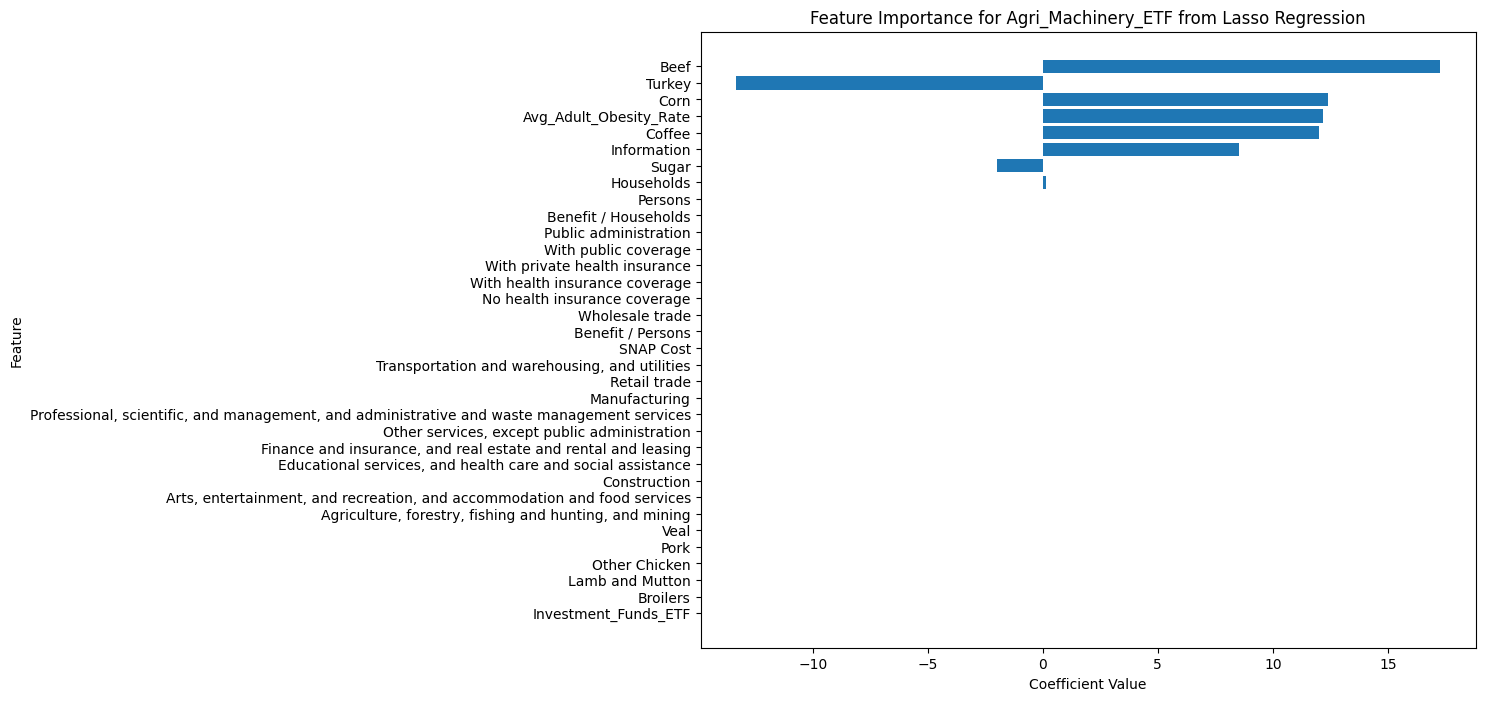

Feature importance for Food_Beverage_ETF:
                                              Feature  Coefficient
9                                              Turkey   -21.136132
6                                     Lamb and Mutton   -18.025783
28                                         Households   -13.151203
17                                      Manufacturing    12.442102
3                                               Sugar    11.890772
2                                                Corn     9.842871
21                                       Retail trade     7.315213
32                                          SNAP Cost     0.000000
31                                  Benefit / Persons     0.000000
30                               Benefit / Households     0.000000
29                                            Persons    -0.000000
19  Professional, scientific, and management, and ...     0.000000
27                               With public coverage     0.000000
26                  

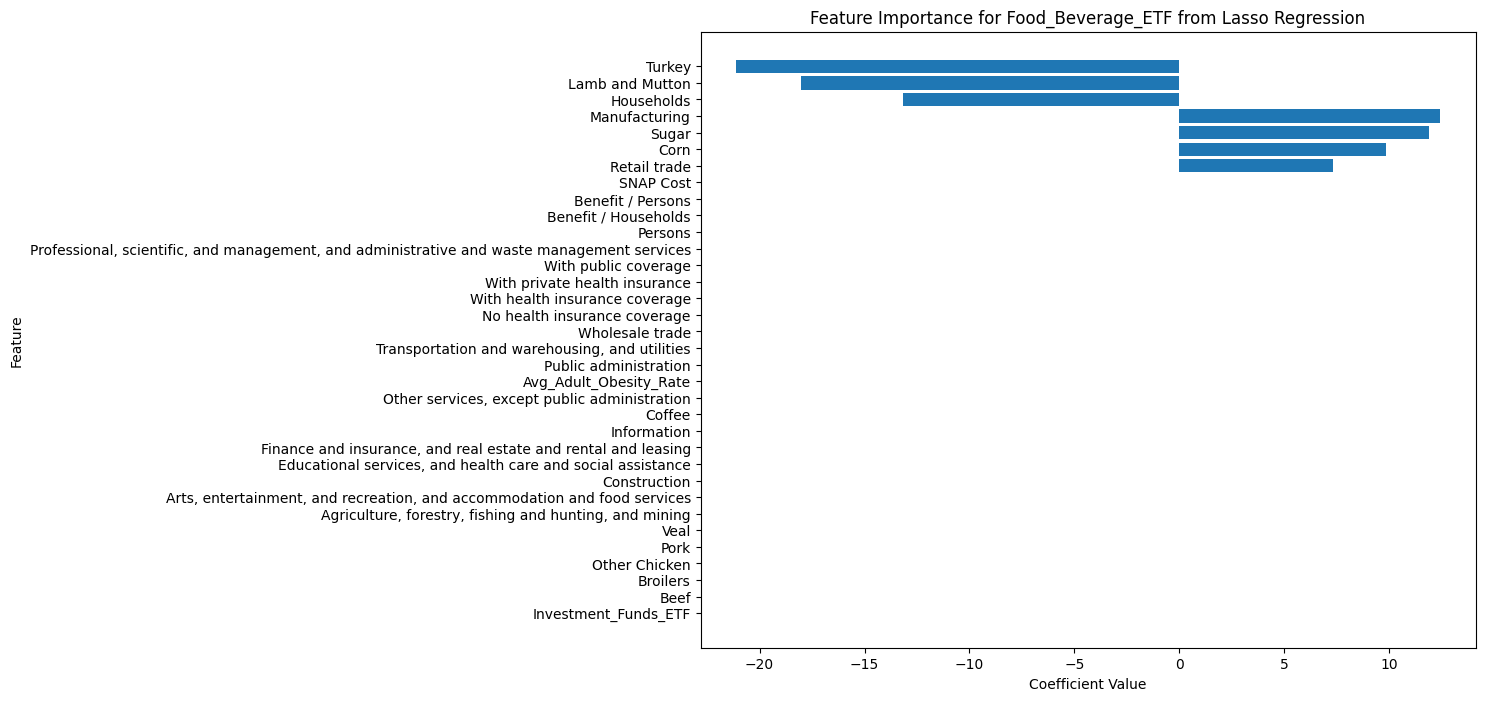

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.017e+02, tolerance: 3.196e+01
  model = cd_fast.enet_coordinate_descent(


Feature importance for Restaurant_FastFood_ETF:
                                              Feature  Coefficient
6                                     Lamb and Mutton   -98.445003
9                                              Turkey   -43.857524
1                                              Coffee    43.741754
16                                        Information   -32.079682
5                                            Broilers    29.558957
7                                       Other Chicken   -19.921439
3                                               Sugar    -8.661775
20                              Public administration     5.797538
2                                                Corn    -5.239774
28                                         Households    -4.745140
33                               Investment_Funds_ETF     3.516707
14  Educational services, and health care and soci...     2.488045
13                                       Construction     1.926698
29            

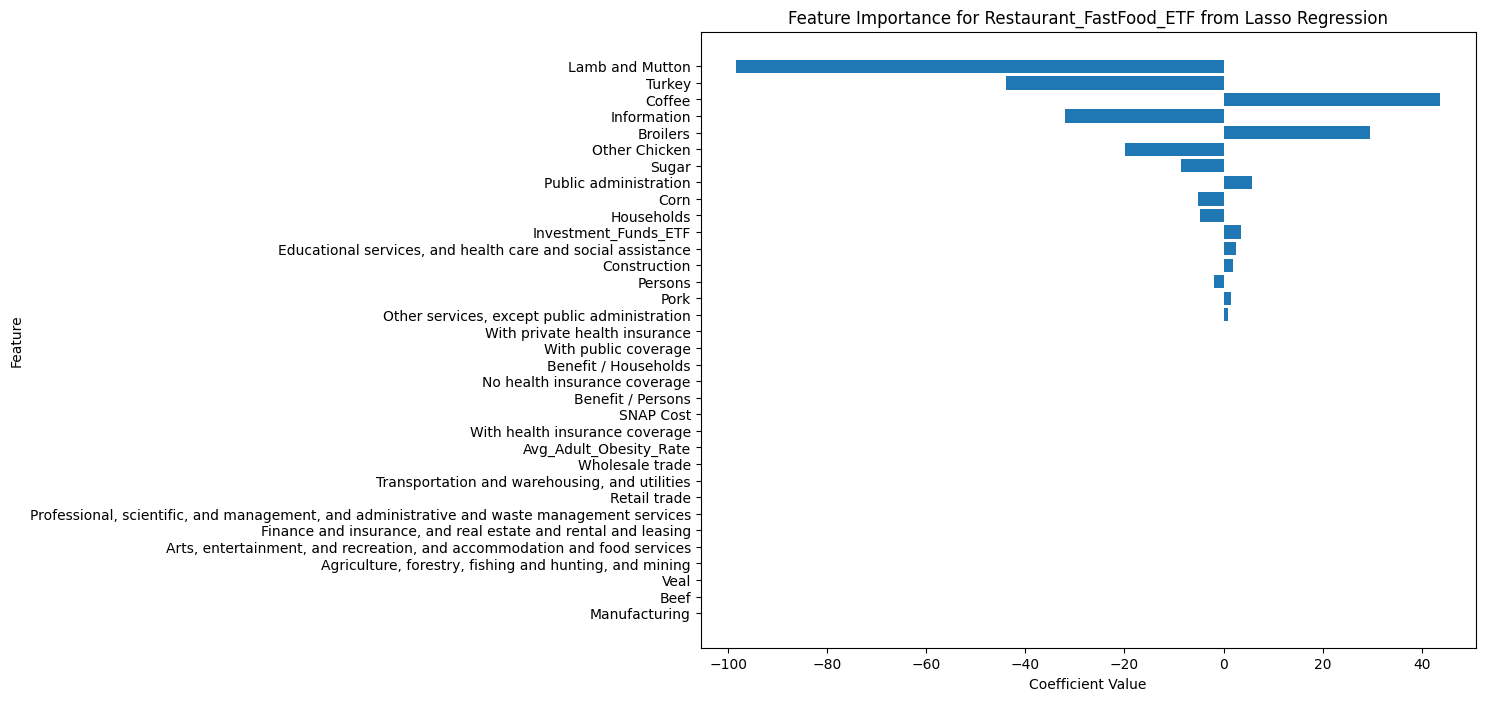

Feature importance for Retail_ETF:
                                              Feature  Coefficient
6                                     Lamb and Mutton   -28.721090
2                                                Corn    27.237916
20                              Public administration    -4.240865
17                                      Manufacturing     3.644869
1                                              Coffee    -2.860833
11  Agriculture, forestry, fishing and hunting, an...     2.250488
9                                              Turkey    -1.447000
29                                            Persons    -0.000000
28                                         Households    -0.000000
30                               Benefit / Households     0.000000
27                               With public coverage     0.000000
31                                  Benefit / Persons     0.000000
26                      With private health insurance     0.000000
25                     With

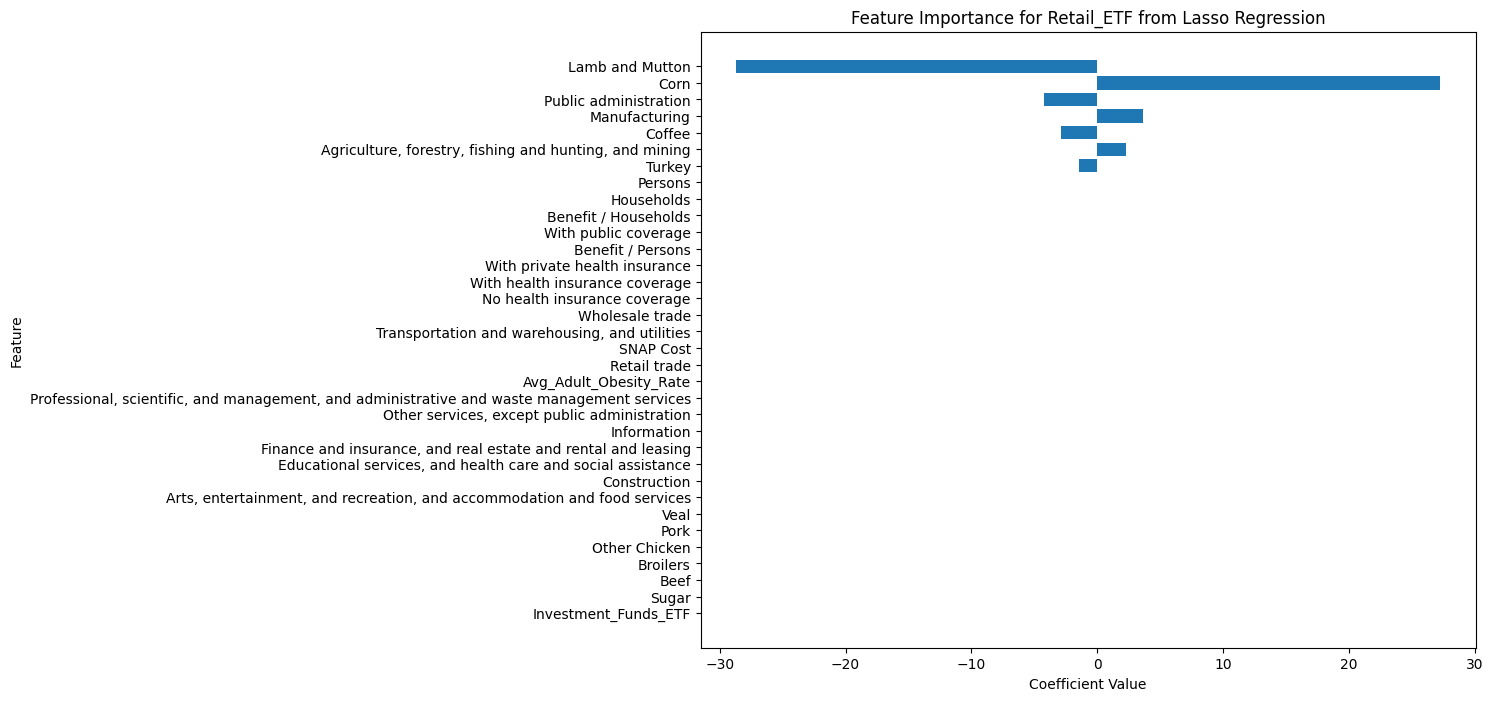

In [109]:
lasso_regression(non_relative_merge)

## Lasso Regression on Relative ETFs

Feature importance for Agri_Machinery_ETF:
                                              Feature  Coefficient
2                                                Corn     2.692364
1                                              Coffee    -2.089766
10                                               Veal     1.925547
3                                               Sugar     0.915394
12  Arts, entertainment, and recreation, and accom...    -0.592136
11  Agriculture, forestry, fishing and hunting, an...    -0.483553
28                                         Households     0.329583
0                              Avg_Adult_Obesity_Rate    -0.000000
22      Transportation and warehousing, and utilities    -0.000000
23                                    Wholesale trade    -0.000000
24                       No health insurance coverage     0.000000
25                     With health insurance coverage    -0.000000
26                      With private health insurance    -0.000000
20                 

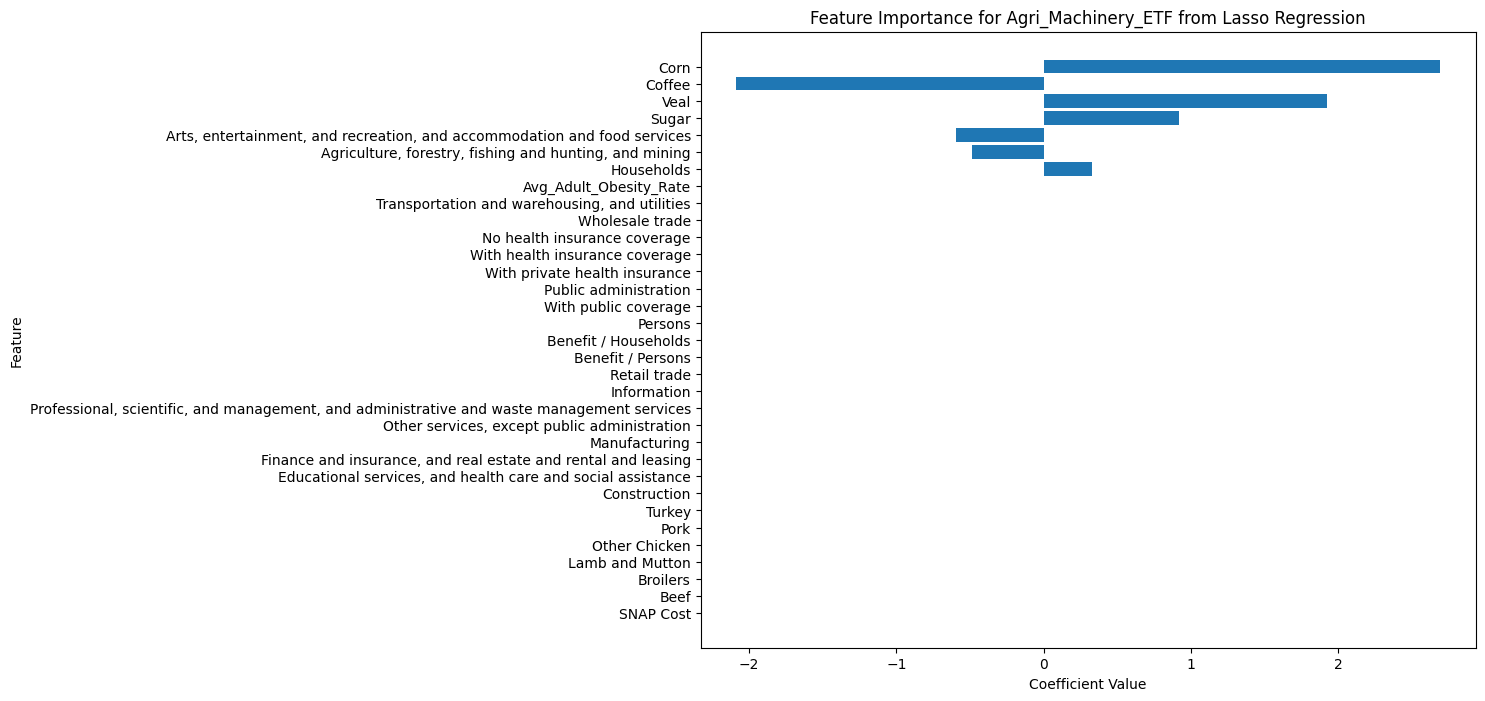

Feature importance for Food_Beverage_ETF:
                                              Feature  Coefficient
2                                                Corn     0.890227
3                                               Sugar     0.171608
1                                              Coffee    -0.129554
12  Arts, entertainment, and recreation, and accom...    -0.101396
18       Other services, except public administration    -0.044276
24                       No health insurance coverage     0.000000
20                              Public administration    -0.000000
21                                       Retail trade    -0.000000
22      Transportation and warehousing, and utilities    -0.000000
23                                    Wholesale trade    -0.000000
0                              Avg_Adult_Obesity_Rate    -0.000000
25                     With health insurance coverage    -0.000000
19  Professional, scientific, and management, and ...    -0.000000
27                  

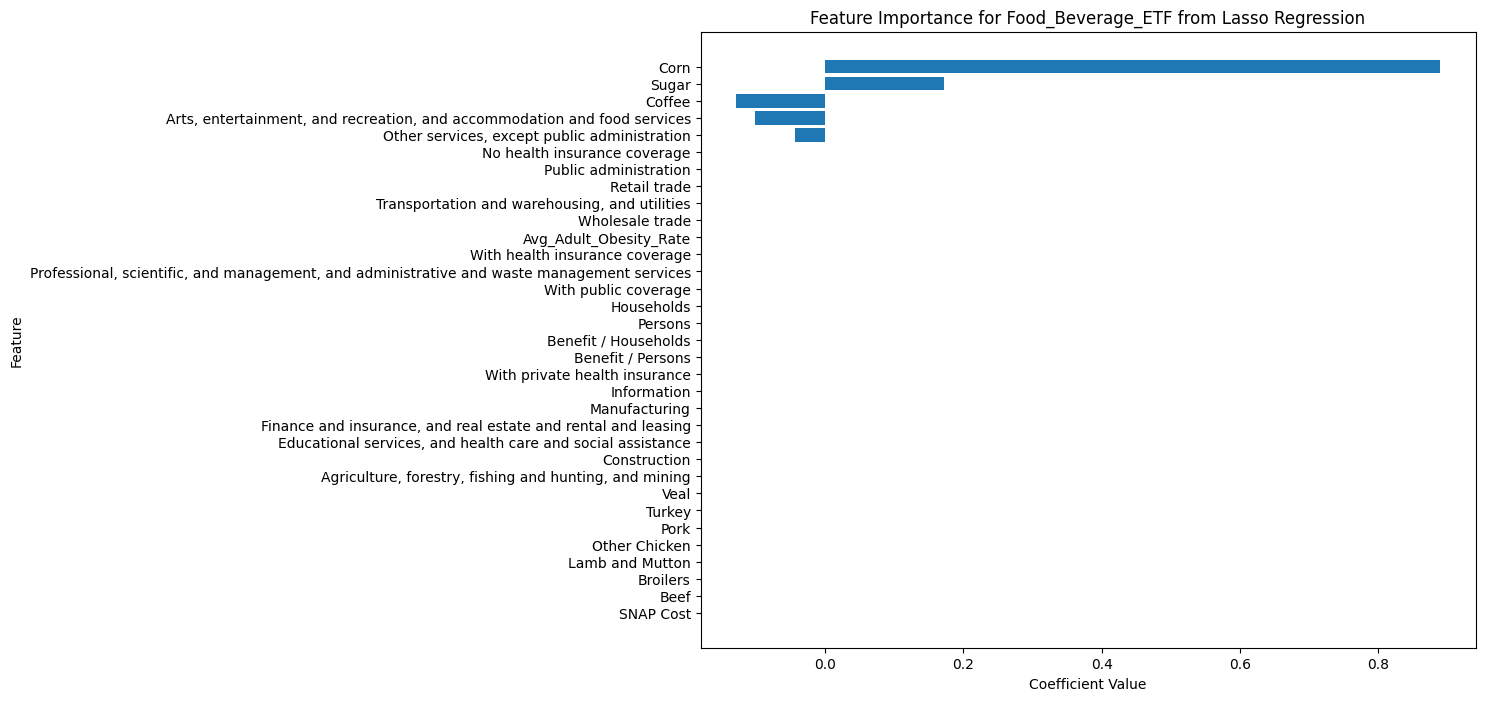

Feature importance for Restaurant_FastFood_ETF:
                                              Feature  Coefficient
1                                              Coffee    -7.199175
2                                                Corn     7.083655
12  Arts, entertainment, and recreation, and accom...    -7.021345
16                                        Information    -2.997431
18       Other services, except public administration    -2.331426
3                                               Sugar     1.119032
24                       No health insurance coverage     0.657324
30                               Benefit / Households    -0.000000
29                                            Persons     0.000000
28                                         Households     0.000000
27                               With public coverage    -0.000000
19  Professional, scientific, and management, and ...    -0.000000
25                     With health insurance coverage    -0.000000
31            

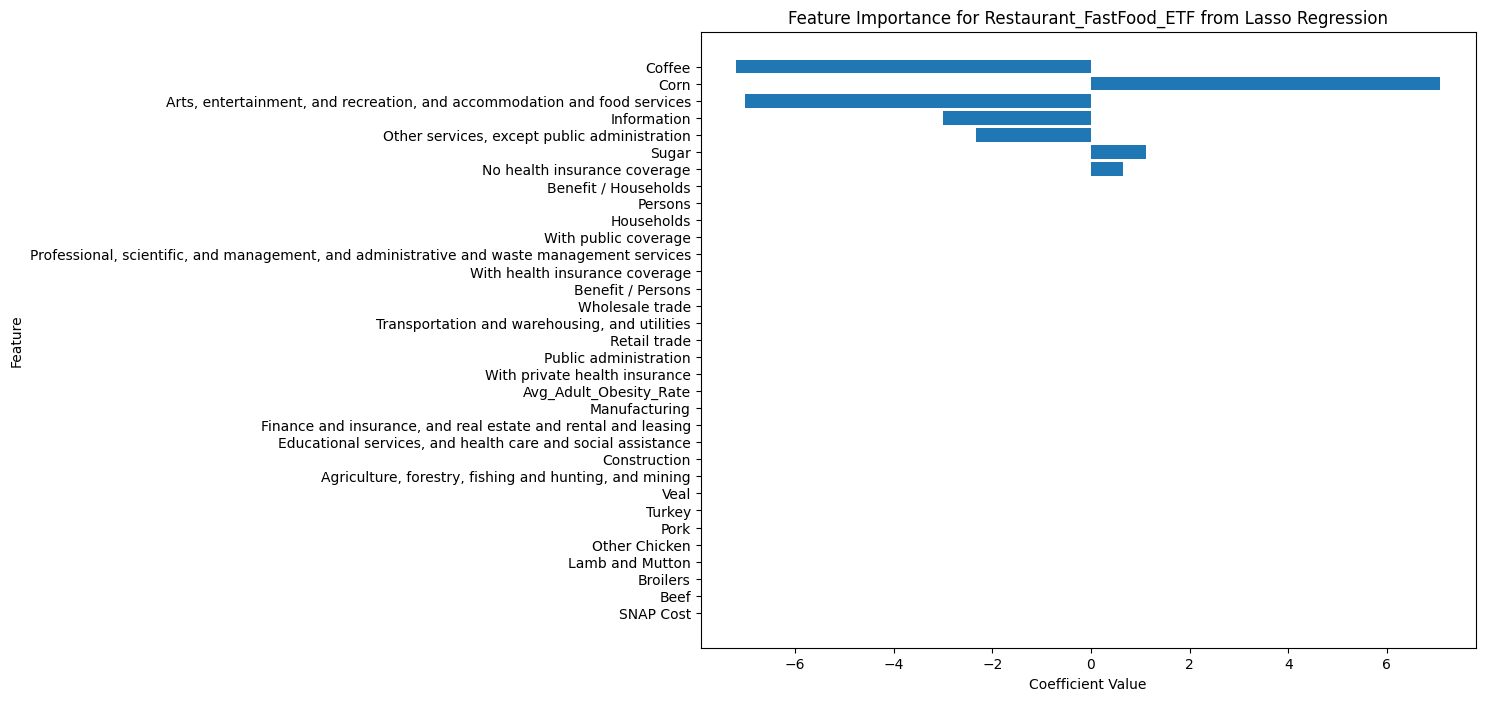

Feature importance for Retail_ETF:
                                              Feature  Coefficient
1                                              Coffee   -12.226762
2                                                Corn    10.002698
12  Arts, entertainment, and recreation, and accom...    -5.482691
3                                               Sugar     4.050028
16                                        Information    -1.295970
28                                         Households     1.242994
24                       No health insurance coverage     0.000000
21                                       Retail trade    -0.000000
22      Transportation and warehousing, and utilities    -0.000000
23                                    Wholesale trade    -0.000000
26                      With private health insurance    -0.000000
25                     With health insurance coverage    -0.000000
19  Professional, scientific, and management, and ...    -0.000000
27                         

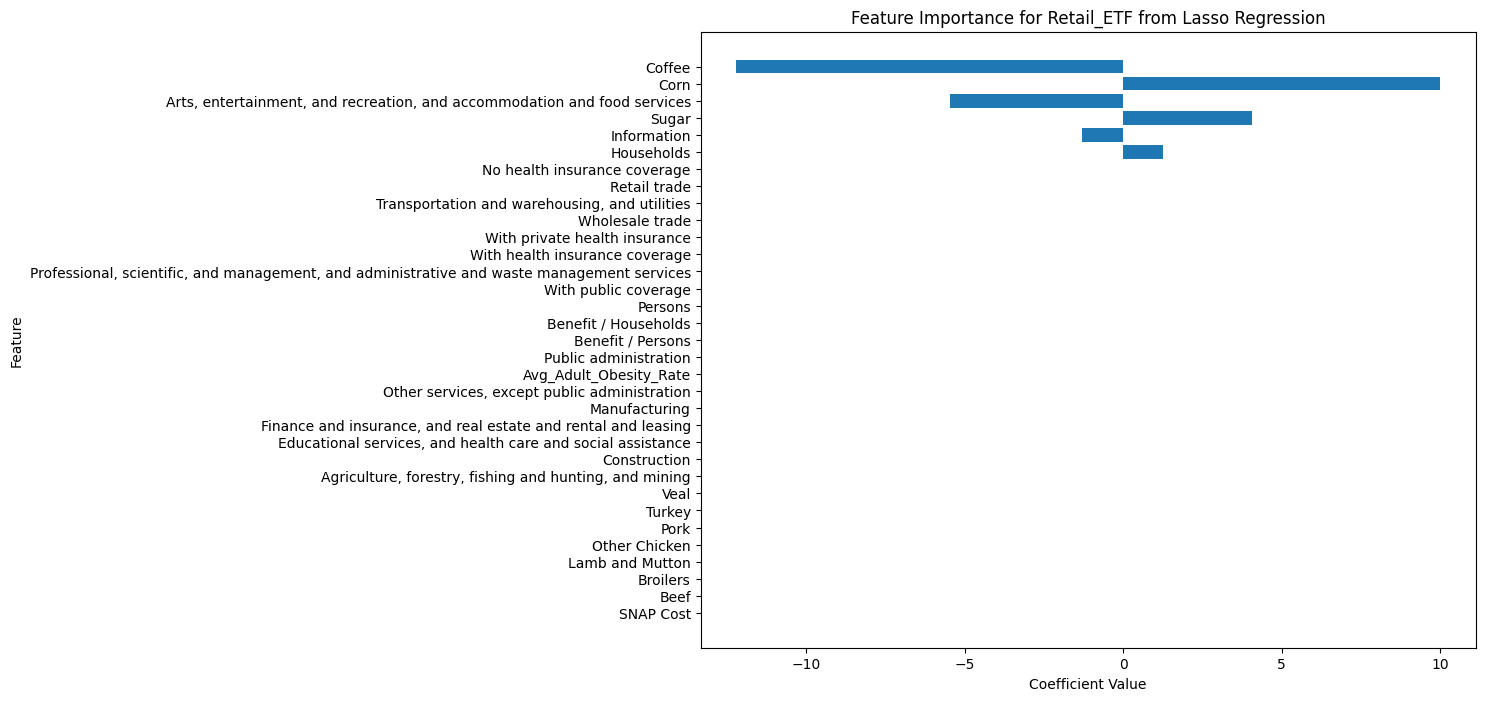

In [110]:
lasso_regression(relative_merge)